In [2]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Tsallis entropy 
#### The Tsallis entropy can be written in compact form 
$$
S_T = \gamma A^\delta
$$ 
#### where $A \propto L^2$ is the area of the system with characteristic lenght $L$. The parameters $\gamma$ and $\delta$ under the hypothesis of equal probabilities are related to the dimensionality of the system $d$, and specifically the important one is 
$$
\delta = \frac{d}{d-1}, \, \, \text{for} \,\, d > 1.
$$
#### In the case where $\delta = 1$ and $\gamma = 2 \pi M_p^2$, with $M_p$ the Planck mass, we obtain the usual additive entropy. 
### Tsallis holographic dark energy 
#### We consider a flat homogeneous and isotropic Friedmann-Robertson-Walker universe, in this case the horizon is 
$$
\int_{x}^{ \infty} \frac{dx}{Ha} = \frac{1}{a} \left( \frac{B}{3 M^2 H^2 \Omega_{DE}} \right)^{\frac{1}{4-2\delta}}. 
$$
#### In this model the evolution of the dark energy is given by the equation 
$$
{\Omega'}_{DE} = \Omega_{DE} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{\frac{3(1-\delta)}{2(2-\delta)}x} \right)
$$
#### where 
$$
Q = 2 (2 - \delta) \left( \frac{B}{3 M_p^2 }\right)^{\frac{1}{2(\delta - 2 )}} \left( H_0 \sqrt{\Omega_{m0}} \right)^{\frac{1-\delta}{\delta-2}}
$$
#### 

### on the other hand, notice that $x = ln(a) = ln(\frac{1}{1+z} ) = - ln(1+z)$, thus 
$$
\frac{d x}{dz} = - \frac{1}{1+z}
$$

### thus, we can rewrite the evolution of the Tsallis holographic dark energy in the form 

$$
\frac{d \Omega_{DE}}{d x} = \frac{d \Omega_{DE}}{dz} \frac{dz}{dx} = - \frac{d \Omega_{DE}}{dz} (1 + z)
$$

$$
\longrightarrow \frac{d \Omega_{DE}}{dz} = -  \frac{\Omega_{DE}}{1+z} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{- \frac{3(1-\delta)}{2(2-\delta)}ln(1+z)} \right)

$$

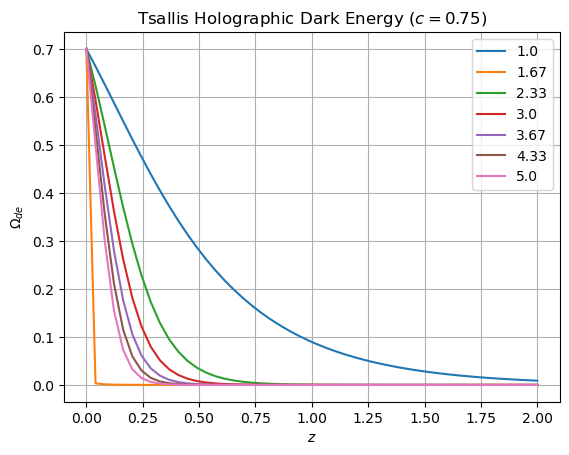

In [3]:
d  = [1.0,1.67,2.33,3.0,3.67,4.33,5.0]
H0 = 70
Om0 = 0.3
Ode_0 = 0.7
zfin = 100
xini = 0
xfin = np.log(1. / (1 + zfin))
xval = np.linspace(xini, xfin, 50)
zval = np.linspace(0,2,50)

def tsallis_model(Omega, x, d_value, c= 0.75):
    Q = 2 * (2 - d_value) * ((3*c / 3) ** (1. / (2 * (d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega * (1. / (2 * (2 - d_value)))) * np.exp(
            (3 * (1 - d_value) / (2 * (2 - d_value))) * x))
    return dOmega


solutions_tsallis = []
for d_value in d:
    sol = odeint(tsallis_model, Ode_0, xval, args=(d_value,))
    solutions_tsallis.append(sol)

# Reshape all solutions in solutions_tsallis
solutions_tsallis_reshaped = []
for sol in solutions_tsallis:
    solutions_tsallis_reshaped.append(sol[:, 0].reshape(-1))

# Plot each component of solutions_tsallis_reshaped against xval
for sol_reshaped in solutions_tsallis_reshaped:
    plt.plot(zval, sol_reshaped)

plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($c = 0.75$)')
plt.legend(d)
plt.grid(True)
plt.show()




In [55]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 2, 50)

hubz = hub(red_z)

arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

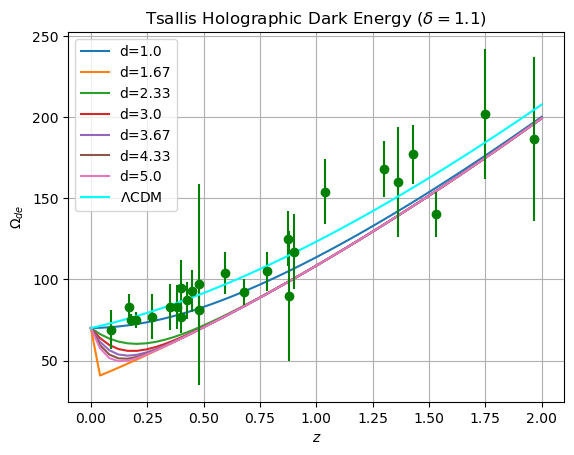

In [59]:
# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0 * np.sqrt((Or * (z + 1) ** 4 + Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z = []
for sol_ode in solutions_tsallis_reshaped:
    Hub = RHSquared_z(zval, sol_ode)
    Hubble_z.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z):
    plt.plot(zval, Hub, label=f'd={d[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(red_z, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($\delta = 1.1$)')
plt.legend()
plt.grid(True)
plt.show()


## Holographic Dark Energy in modfied Barrow Cosmology 
#### Sheykhi, A., & Hamedan, M. S. (2023). Holographic Dark Energy in Modified Barrow Cosmology. Entropy, 25(4), 569. https://doi.org/10.3390/e25040569. 
#### Int his model que area law of the black hole entropy get modified 
$$
S = \left( \frac{A}{A_0} \right)^{1+\frac{\delta}{2}}
$$
#### where $A$ is the black hole horizon and $A_0$ is the Planck area. Thee exponent $\delta$ ranges as $0 \leq \delta \leq 1 $ and represents the amount of the quamtum-gravitational deformation effects. 
#### For the no non-interacting case the simensionless parameters are 
$$
\Omega_{de} = \frac{\rho_{de}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
$$
\Omega_{m} = \frac{\rho_{m}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
#### The evolution of the dark energy is given by the equation 
$$
{\Omega'}_{de} = \Omega_{de} \left( 1 - \Omega_{de} \right) \left( 1 + \delta + \left( 2 - \delta \right) \left(\frac{\Omega_{de}}{c^2} \right)^{\frac{1}{2\delta}} \right) 
$$

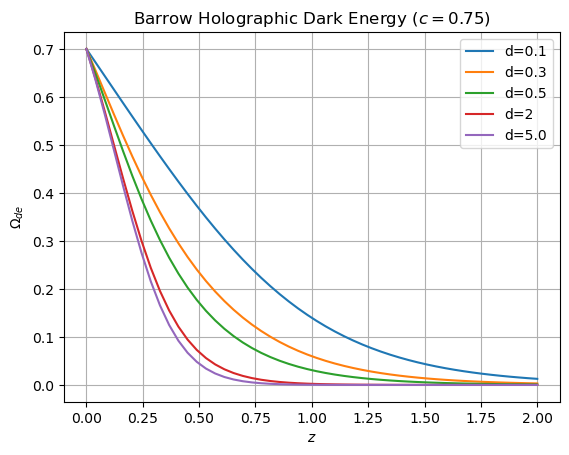

In [60]:

# Define global constants
d = [0.1,0.3,0.5,2,5.00]
c = 1.0

# Define the model
def barrow_model(Omega, x, d_value = 0.1):
    ex = (1. / (2 * d_value))
    dOmega = Omega * (1 - Omega) * (1 + d_value + (2 - d_value) * ((Omega / c ** 2) ** (ex)))
    return dOmega  


solutions_barrow = []
for d_value in d:
    sol = odeint(barrow_model, Ode_0, xval, args=(d_value,))
    solutions_barrow.append(sol)


# Reshape all solutions in solutions_barrow
solutions_barrow_reshaped = []
for sol in solutions_barrow:
    solutions_barrow_reshaped.append(sol[:, 0].reshape(-1))

# Plot each component of solutions_barrow_reshaped against xval
for i, sol_reshaped in enumerate(solutions_barrow_reshaped):
    plt.plot(zval, sol_reshaped, label=f'd={d[i]}')
plt.plot()
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Barrow Holographic Dark Energy ($c = 0.75$)')
plt.legend()
plt.grid(True)
plt.show()


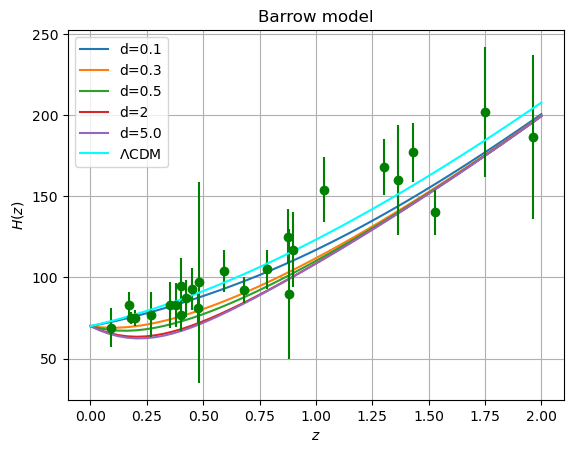

In [61]:
z_new = np.linspace(0,2,50)
def RHSquared_z_barrow(z, sol_ode):
    return H0 * np.sqrt((Or * (z + 1) ** 4 + Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z_barrow = []
for sol_ode in solutions_barrow_reshaped:
    Hub = RHSquared_z(zval, sol_ode)
    Hubble_z_barrow.append(Hub)

# Plot each component H(z) for d values
for i, Hub in enumerate(Hubble_z_barrow):
    plt.plot(z_new, Hub, label=f'd={d[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(z_new, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.title('Barrow model')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 3, 100)

hubz = hub(red_z)

arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

### Shooting method 

The initial value at z=3 is  0.1463661929152792


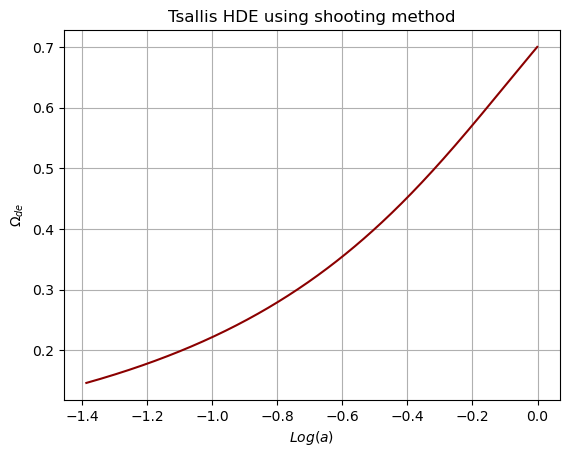

In [8]:
# Tsallis holographic dark energy case 
B   = [0.1,0.01,0.02,0.05,0.08]
H0 = 70 
Om0 = 0.3
# we use a model with specific values 
def tsallis_model000(Omega,x,d=0.9,b1 = B[0]):
    Q = 2*(2-d)*( (b1/3)**(1./(2*(d-2))))*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x))
    return dOmega

# define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# find the root of the function 

def tsallis_root(Omega_0 , Ode0=0.7):

    result_loga_tsallis = odeint(tsallis_model000, Omega_0*10**(-5),x_loga)
    return result_loga_tsallis[-1] - Ode0

# Using the Newton method to optimize 
s = optimize.newton(tsallis_root,np.log(0.9999))
# solving again the function with the initial value found 
sol_tsallis_shooting =odeint(tsallis_model000, s*10**(-5), x_loga)

# plot the solution 
plt.plot(x_loga, sol_tsallis_shooting,color='darkred',)
print('The initial value at z=3 is ', float(sol_tsallis_shooting[0]))
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis HDE using shooting method')
plt.grid()


### Barrow Holographic Dark Energy

The initial value at z=3 is  0.0934297165010478


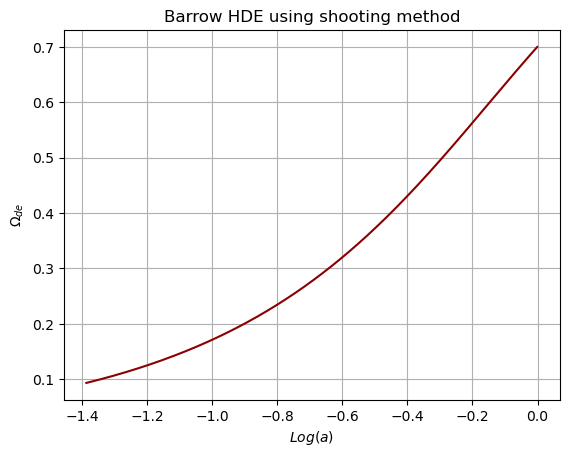

In [9]:

# Define the Barrow model 
def barrow_model000(Omega, x, d=0.5, c=0.8):
    dOmega = Omega * (1 - Omega) * (1 + d + (2 - d) * ((Omega / c ** 2) ** (1. / (2 * d))))
    return dOmega 

# Define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# Find the root of the function 
def barrow_root(Omega_0, Ode0=0.7):
    result_loga_barrow = odeint(barrow_model000, Omega_0*10**(-5), x_loga)
    return result_loga_barrow[-1] - Ode0

# Using the Newton method to optimize 
s1 = optimize.newton(barrow_root, np.log(0.9999))

# Solving again the function with the initial value found 
sol_barrow_shooting = odeint(barrow_model000, s1*10**(-5), x_loga)

# Plot the solution 
plt.plot(x_loga, sol_barrow_shooting, color='darkred')
print('The initial value at z=3 is ', float(sol_barrow_shooting[0]))
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Barrow HDE using shooting method')
plt.grid()
plt.show()


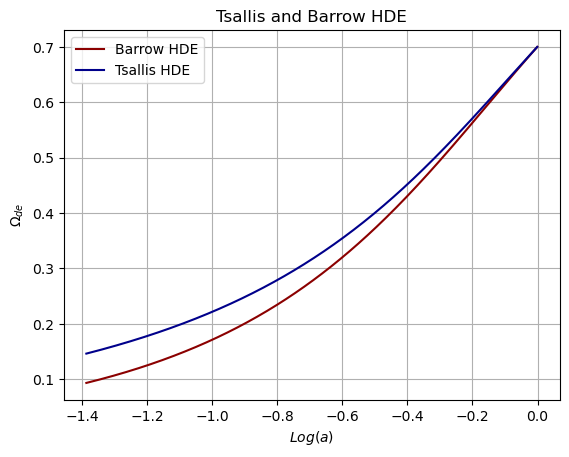

In [10]:
plt.plot(x_loga, sol_barrow_shooting, color='darkred',label='Barrow HDE')
plt.plot(x_loga, sol_tsallis_shooting,color='darkblue',label ='Tsallis HDE')
plt.legend()
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis and Barrow HDE')
plt.grid()
plt.show()

8.533047625744066e-17